In [1]:
%matplotlib inline
import rebound
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('paper')

# Change parameters here

In [2]:
mu=3e-6          # m_1/m_star
j, k = 10, 1     # j:j-k MMR
pomega = np.pi/2 # pericenter of outer test particle
phi = 2*np.pi/3  # Angle of conjunction relative to pericenter (resonant angle)

n = 2*np.pi
n20 = n*(j-k)/j
ec = 2*k/3/j
etilde = 0.3
e = etilde*ec
deltat = 2/3/n20 # time to move delta a in y at a rate delta v

In [3]:
def setup(t0=-deltat, theta=None): # make sim with sim.t = t0 (where conjunction always happens near t=0, use get_conjunction_time to get exact)
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1)
    sim.add(m=mu, P=1, 
            l=pomega+phi+n*t0) # phi = l - pomega, so l = pomega+phi
    ps = sim.particles
    if theta is None:
        theta = pomega+phi+n20*t0
    sim.add(P=2*np.pi/n20, e=etilde*ec, pomega=pomega, l=theta) # use f instead of lambda to be exact loc
    sim.t = t0
    return sim

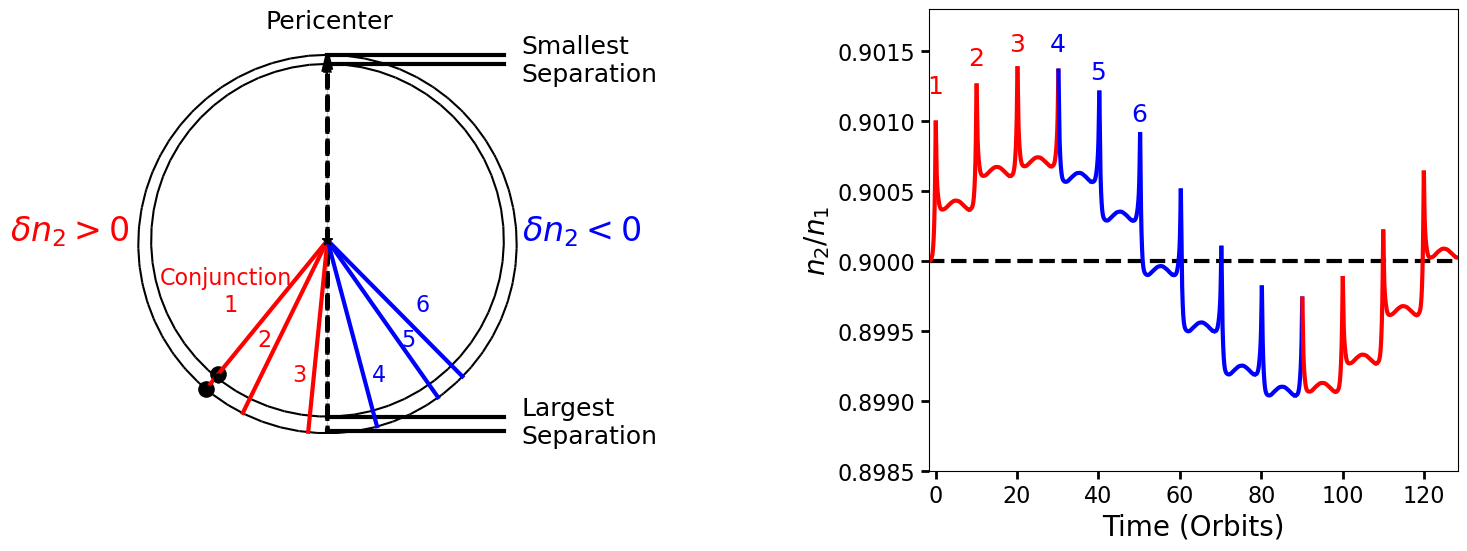

In [81]:
def runconj(ax1, ax2, color, q):
    deltatheta = np.sin(ps[1].theta - ps[2].theta)
    searchtimes = np.linspace(sim.t, sim.t+ps[1].P*j/k, Nsearch)
    nratio = np.zeros(Nsearch)
    for i, time in enumerate(searchtimes):
        sim.integrate(time)
        nratio[i] = ps[2].n/ps[1].n
        prevdeltatheta = deltatheta
        deltatheta = np.sin(ps[1].theta - ps[2].theta)
        if prevdeltatheta < 0 and deltatheta > 0:
            iconj = i
            ax2.plot(searchtimes[:iconj], nratio[:iconj], color=color)
            theta = ps[2].pomega-np.pi/2
            if np.sin(ps[2].l-ps[2].pomega) > 0:
                color='r'
            else:
                color='b'
            R = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
            x2,y2 = np.matmul(R, [[ps[2].x], [ps[2].y]])
            x1,y1 = np.matmul(R, [[ps[1].x], [ps[1].y]])
            
            if q < 6:
                ax1.plot([0,x2], [0,y2], color=color)
                if q == 0:
                    ax1.scatter([0.9*x2, x2], [0.9*y2,y2], color='k', s=120)
    ax2.plot(searchtimes[iconj:], nratio[iconj:], color=color)
    return color
    
Nmax=13
Nsearch=1000
Narc=128
tconj=j/k # ps[1].P = 1
tmin=-tconj/6
tmax=tmin+tconj*Nmax
sim = setup(t0=0.06)

fig = plt.figure(figsize=(18,6))
gs = GridSpec(1,5)
ax1 = fig.add_subplot(gs[0,:2])
ax2 = fig.add_subplot(gs[0,3:])
ax2.set_ylim([0.8985, 0.9018])
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.1,1.1])
ax1.set_aspect('equal')
ax1.axis('off')
ax2.set_xlim([tmin, tmax])
ax2.axhline((j-k)/j, color='k', linestyle='--')
ax2.set_xlabel('Time (Orbits)')
ax2.set_ylabel(r'$n_2/n_1$')
#plt.subplots_adjust(wspace=1)
rebound.OrbitPlot(sim, fig=fig, ax=ax1, orbit_style='solid', lw=1.5)
ax1.arrow(0, -1.1, 0, 2.05, head_width=0.05, head_length=0.1, fc='k', ec='k', linestyle='dashed', lw=3)
ax1.text(-0.35, 1.2, 'Pericenter', fontsize=18)
ax1.plot([0.,1], [1.05, 1.05], 'k', lw=3)
ax1.plot([0.,1], [1.0, 1.0], 'k', lw=3)
ax1.text(1.1, 0.9, 'Smallest\nSeparation', fontsize=18)
ax1.plot([0.,1], [-1.08, -1.08], 'k', lw=3)
ax1.plot([0.,1], [-1.0, -1.0], 'k', lw=3)
ax1.text(1.1, -1.15, 'Largest\nSeparation', fontsize=18)
ax1.text(-0.95, -0.4, 'Conjunction\n         1', color='r', fontsize=16)
ax1.text(-0.4, -0.6, '2', color='r', fontsize=16)
ax1.text(-0.2, -0.8, '3', color='r', fontsize=16)
ax1.text(0.25, -0.8, '4', color='b', fontsize=16)
ax1.text(0.42, -0.6, '5', color='b', fontsize=16)
ax1.text(0.5, -0.4, '6', color='b', fontsize=16)
ax2.text(-2, 0.9012, '1', color='r', fontsize=18)
ax2.text(8, 0.9014, '2', color='r', fontsize=18)
ax2.text(18, 0.9015, '3', color='r', fontsize=18)
ax2.text(28, 0.9015, '4', color='b', fontsize=18)
ax2.text(38, 0.9013, '5', color='b', fontsize=18)
ax2.text(48, 0.901, '6', color='b', fontsize=18)

ax1.text(-1.8, 0, r'$\delta n_2 > 0$', color='r', fontsize=24)
ax1.text(1.1, 0, r'$\delta n_2 < 0$', color='b', fontsize=24)
sim = setup(t0=tmin)
ps = sim.particles
color='r'
for q in range(Nmax):
    color = runconj(ax1, ax2, color, q)

fig.savefig('qualitative.pdf', bbox_inches='tight')